# Домашняя работа 3
## Математическая оптимизация

В этом домашнем задании вам предстоит найти минимум функции используя метод `RMSProp`.

### Вам дана функция $y(x) = x^{3} \ln(x)$

1. Выпишите вид производной этой функции ($y'(x)$). (можно сделать это в виде latex кода, добавления картинки или записью кода python)

    $y'(x) = x^{2} + 3x^{2} \ln(x)$

2. Реализуйте функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$).

In [2]:
import numpy as np

def dy(x0):
  return x0**2 + 3 * x0**2 * np.log(x0)

3. Реализуйте функцию `get_min_with_gd(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

In [3]:
def get_min_with_gd(x0, func_grad, steps=100, lr=0.01, threshold=0.0001):
  
  x = x0
  points = [x]

  for i in range(steps):
    grad = func_grad(x)
    x = x - lr * grad
    points.append(x)

    if np.abs(x - points[-2]) <= threshold:
      break
  
  return points

In [4]:
# Запустите поиск минимума с любой точки, например с точки 10

history = get_min_with_gd(x0=10, func_grad=dy, steps=1000, lr=0.001, threshold=0.001)
print(f' Список первых 10-и и последних 10-и точек градиента при x0 = 10:\n{history[:10]}\n{history[-10:]}', end='\n\n')
print(f' Число фактически совершённых шагов при заданном значении в 1000 шагов: {len(history)}\nФактических шагов меньше чем было заданно. Это значит, что сработало пороговое значение изменения спуска - threshold')
print('\n Важный нюанс, если lr сделать больше, то могут получаться отрицательные или равные нулю точки, а у нас функция содержит\nв себе натуральный логарифм, который при отрицательном или равным нулю x будет неопределён, отсюда будут "сыпаться" nan-ы')

 Список первых 10-и и последних 10-и точек градиента при x0 = 10:
[10, 9.209224472101786, 8.559528964996122, 8.01435018458114, 7.549088645821265, 7.146504203177678, 6.794110441439724, 6.48261541642625, 6.204945210492911, 5.955608968799766]
[1.0076842925960596, 1.0066455459142636, 1.0056120749936468, 1.00458384121755, 1.003560806351457, 1.002542932538211, 1.001530182293304, 1.0005225185002378, 0.9995199044059532, 0.9985223036163293]

 Число фактически совершённых шагов при заданном значении в 1000 шагов: 375
Фактических шагов меньше чем было заданно. Это значит, что сработало пороговое значение изменения спуска - threshold

 Важный нюанс, если lr сделать больше, то могут получаться отрицательные или равные нулю точки, а у нас функция содержит
в себе натуральный логарифм, который при отрицательном или равным нулю x будет неопределён, отсюда будут "сыпаться" nan-ы


4. Проверьте, что все работает ожидаемым образом, запустив ячейку ниже

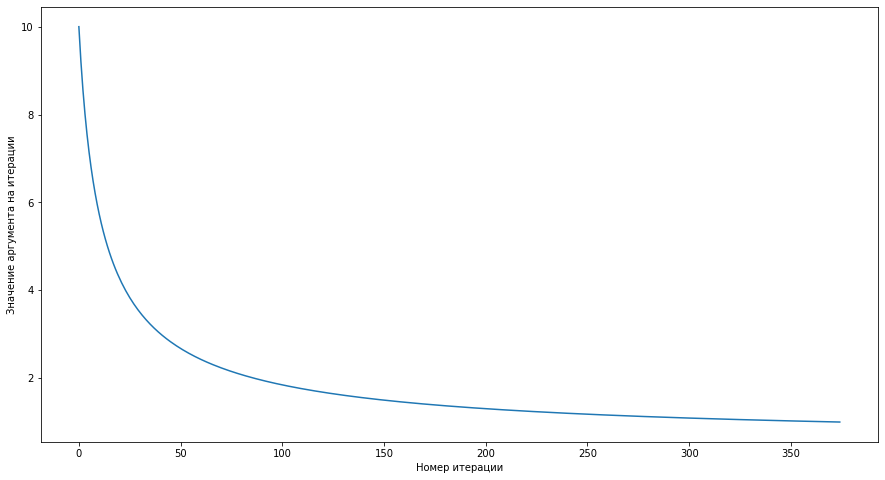

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

5. Реализовать поиск минимума при помощи алгоритма `RMSProp`. Реализуйте функцию `get_min_with_rmsprop(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr, $β$ и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

Напомним как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ -- learning rate, $ɛ$ -- малое число (можно взять 0.0001 -- оно нужно, чтобы случайно не было деления на 0), $\beta$ -- мера учета инерции

In [6]:
def get_min_with_rmsprop(x0, func_grad, steps=100, beta=0.01, lr=0.001, threshold=0.0001):
  w = x0
  points = [w]

  y = 0

  for i in range(steps):
    grad = func_grad(w)
    y = (1 - beta) * y + beta * grad ** 2
    w = w - lr / (y + 0.0001) ** 0.5 * grad
    points.append(w)
    
    if np.abs(w - points[-2]) <= threshold:
      break
  
  return points

In [7]:
# Запустите поиск минимума с нескольких точек, например с 0 и 2

history_rmsprop_1 = get_min_with_rmsprop(0, dy) # натуральный логарифм нуля не определён 
history_rmsprop_2 = get_min_with_rmsprop(2, dy, lr=0.01, beta=0.01, steps=1000)

<ipython-input-2-a35fe436897b>:4: RuntimeWarning: divide by zero encountered in log
  return x0**2 + 3 * x0**2 * np.log(x0)
<ipython-input-2-a35fe436897b>:4: RuntimeWarning: invalid value encountered in double_scalars
  return x0**2 + 3 * x0**2 * np.log(x0)


6. Нарисовать график, на котором отображен реальный минимум функции и все точки, которые были получены на каждом шаге RMSProp алгоритма.

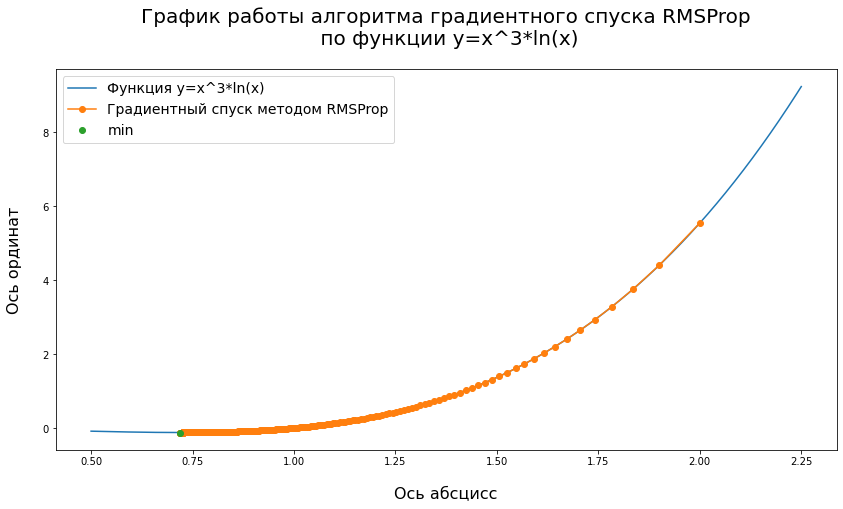

In [25]:
fig, ax = plt.subplots()

# возьмём значения от 0.5 до 2.25 равномерно разделённые по кол-ву получившихся
# точек (шагов) в history_rmsprop_2 и их результат по исходной функции y=x^3*ln(x)

ax.plot(np.linspace(0.5, 2.25, len(history_rmsprop_2)), 
        [i**3 * np.log(i) for i in np.linspace(0.5, 2.25, len(history_rmsprop_2))],
        label='Функция y=x^3*ln(x)')


# теперь сделаем тоже самое, но уже для history_rmsprop_2
ax.plot(history_rmsprop_2, [i**3 * np.log(i) for i in history_rmsprop_2], '-o',
        label='Градиентный спуск методом RMSProp')

plt.plot(history_rmsprop_2[-1], history_rmsprop_2[-1]**3 * np.log(history_rmsprop_2[-1]), 'o', label='min')

fig.set_size_inches(14,7)

ax.set_title('График работы алгоритма градиентного спуска RMSProp\n по функции y=x^3*ln(x)', 
             y=1.05, fontdict={'fontsize': 20})
ax.set_xlabel('Ось абсцисс', labelpad=20, fontdict={'fontsize': 16})
ax.set_ylabel('Ось ординат', labelpad=20, fontdict={'fontsize': 16})
ax.legend(fontsize=14)
plt.show()

Как мы видим, алгоритм нашёл минимум функции и дальше не стал тратить "силы" на уменьшение уже и без того малого значения.